In [4]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [59]:
class World:
    def __init__(self, debug=False):
        self.objects = []             # ここにロボットなどのオブジェクトを登録
        self.debug = debug
        
    def append(self,obj):             # オブジェクトを登録するための関数
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))                # 8x8 inchの図を準備
        ax = fig.add_subplot(111)                      # サブプロットを準備
        ax.set_aspect('equal')                         # 縦横比を座標の値と一致させる
        ax.set_xlim(-0.5,2.5)                              # X軸を-5m x 5mの範囲で描画
        ax.set_ylim(-1,2.5)                              # Y軸も同様に
        ax.set_xlabel("X",fontsize=10)                 # X軸にラベルを表示
        ax.set_ylabel("Y",fontsize=10)
        ax.plot([0,0], [0,1.8], color="k")
        ax.plot([0.5,1.8], [0,0], color="k")
        ax.plot([1.8, 1.8], [0,1.8], color="k")
        ax.plot([0,1.8], [1.8,1.8], color="k")
        
        ax.plot([0,0],[0,-0.5],color="k")
        ax.plot([0,0.5],[-0.5,-0.5],color="k")
        ax.plot([0.5,0.5],[0,-0.5],color="k")

        ax.plot([0.6,0.88],[0.4,0.4],color="k")
        ax.plot([0.6,0.88],[1.3,1.3],color="k")
        ax.plot([0.6,0.6],[0.4,1.3],color="k")
        ax.plot([0.88,0.88],[0.4,1.3],color="k")
        
        ax.plot([0,0],[0.1,0.4],color="g")
        ax.plot([0,0],[0.75,1.05],color="b")
        ax.plot([0,0],[1.4,1.7],color="r")
        ax.plot([0.01,0.01],[0.1,0.4],color="g")
        ax.plot([0.01,0.01],[0.75,1.05],color="b")
        ax.plot([0.01,0.01],[1.4,1.7],color="r")
        ax.plot([-0.01,-0.01],[0.1,0.4],color="g")
        ax.plot([-0.01,-0.01],[0.75,1.05],color="b")
        ax.plot([-0.01,-0.01],[1.4,1.7],color="r")
        elems = []
        
        time_increment = 0.1
        
        if self.debug:        
            for i in range(1000): self.one_step(i, elems, ax) 
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=100, interval=1000, repeat=False)
            plt.show()
        
    def one_step(self, i, elems, ax):    ### fig:one_step1 (27-29行目) fig:one_step2 （27-31行目） 
        while elems: elems.pop().remove()
        elems.append(ax.text(-4.4, 4.5, "t = "+str(i), fontsize=10)) #座標ベタ書きが気になるなら変数に
        for obj in self.objects: # 追加
            obj.draw(ax, elems)  # 追加

In [62]:
class IdealRobot:
    def __init__(self, pose, color="black"):
        self.pose = pose
        self.r = 0.1
        self.color = color
    
    def draw(self, ax, elems):                ### fig:append_elements (7-13行目)
        x, y, theta = self.pose
        xn = x + self.r * math.cos(theta)
        yn = y + self.r * math.sin(theta)
        elems += ax.plot([x,xn], [y,yn], color=self.color) # elems += を追加
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) # c = を追加
        elems.append(ax.add_patch(c))   # elem.appendで包む

<IPython.core.display.Javascript object>


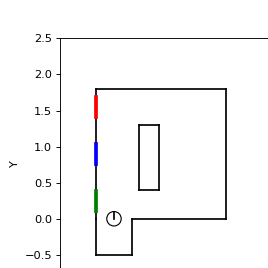

In [64]:
world = World(debug=False)        

robot1 = IdealRobot( np.array([0.25, 0, math.pi/2]).T )           # ロボットのインスタンス生成（色を省略）
world.append(robot1)                                      # ロボットを登録 
world.draw()